In [1]:
# importando bibliotecas uteis em python:
import numpy as np
from random import uniform
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from scipy import signal
import networkx as nx

In [2]:
# importando nossas funcoes:
from modules.sphere import gz2D,volfont,gx2D
from modules.gravity2D import g_sphere
from modules.distances import l1dist,l2dist
from modules.distances import l1dist, l2dist, distgraph,distgraphl1,distgraphmaha
from modules.graphs import getgraph

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é:
# $g_z = -G\frac{m (z-zc)}{((x-xc)^2 + (z-zc)^2)^{3/2}}$


In [3]:
# definicao das coordenadas do perfil sintetico:
def posgrav(xmin,xmax,n):
    #vetor de coordenadas das diferentes posicoes do gravimetro
    x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil
    return x

# posicoes sinteticas de observacao:
x = posgrav(-500.0,500.0,100)
z = -10.0 + x*0.0 # cota fixa de altura
#z = -300.0*signal.gaussian(100, std=15)

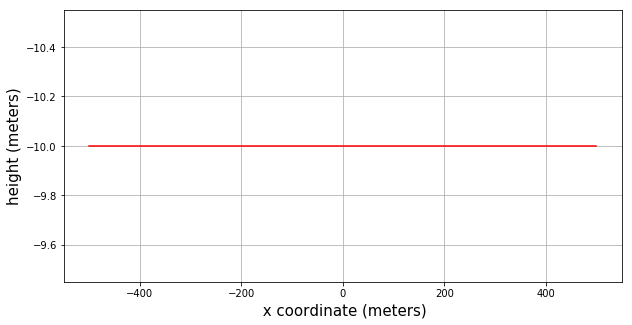

In [4]:
#----------- plot the observation positions: ---------------------#
plt.figure(figsize=(10,5), facecolor='w')
plt.gca().invert_yaxis()
plt.plot(x,z, color='red')#, marker='*', linestyle='dashed',
        #linewidth=1, markersize=7)
plt.xlabel(' x coordinate (meters)',fontsize=15 )
plt.ylabel('height (meters)', fontsize=15)
#plt.ylim(-9.0, -11.0)
#plt.xlim(-70.0, +70.0)
plt.grid()
plt.show()

In [5]:
# Implementacao antiga do Sr. Edson usando a funcao volfont:
raio = volfont(10,2000)[0] # metros
rho = volfont(10,2000)[1] #kg/m3
V = volfont(10,2000)[2] # m3
massa = volfont(10,2000)[3] # kg

### <center> Sorteio dos parametros referentes aos pontos de massa:<center>

In [6]:
npoints = 110 # numero de fontes pontuais utilizadas
sphere = []
for i in range(npoints):
    xc = uniform( -400.0, 400.0  ) #min(x), max(x) )
    zc = uniform( 100.0, 700.0 )
    mass = uniform( 1.0e9, 1.0e10 )
    sphere.append([xc, zc, mass])

In [7]:
# ----- Calculo do gz das fontes pontuais
gz1 = g_sphere(x,z,sphere,component='z')

# ----- Calculo do gx das fontes pontuais
gx1 = g_sphere(x,z,sphere,component='x')

In [8]:
# ----- Calculo do gx das fontes pontuais
gx2 = 0.0
gz2 = 0.0
for i,j in enumerate(sphere):
    gx2 += gx2D(x,z,sphere[i])
    gz2 += gz2D(x,z,sphere[i])

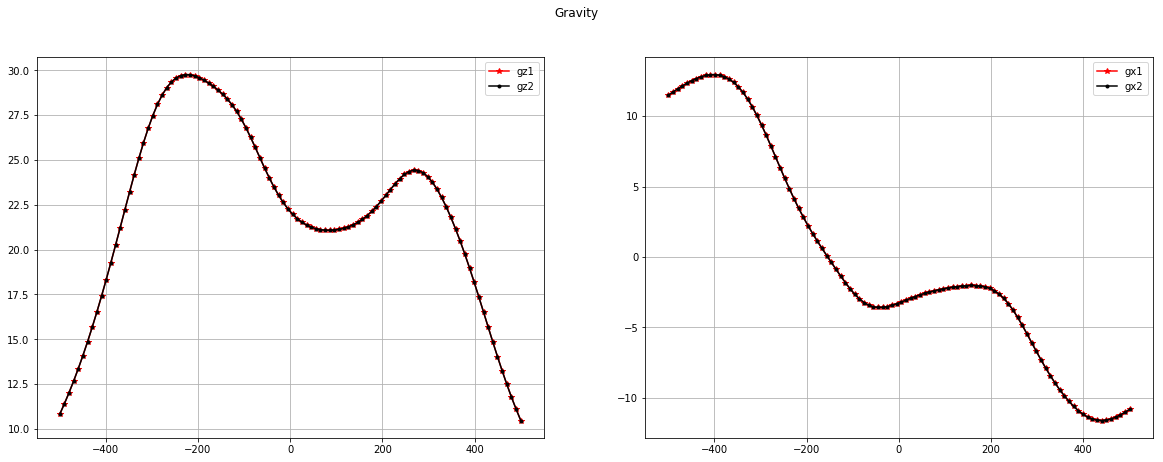

In [9]:
sphere = np.array(sphere)
plt.figure(figsize=(20,7), facecolor='w')
plt.suptitle('Gravity')
plt.subplot(121)
plt.plot(x,gz1,'*-r', label='gz1')
plt.plot(x,gz2,'.-k', label='gz2')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(x,gx1,'*-r', label='gx1')
plt.plot(x,gx2,'.-k', label='gx2')
plt.legend()
plt.grid()

plt.show()

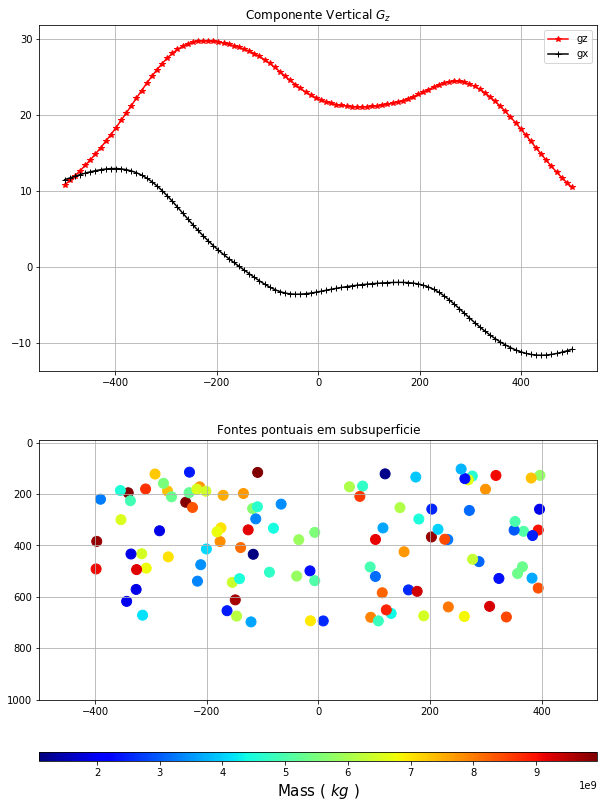

In [10]:
### plot data and the model #####
plt.figure(figsize=(10,14),facecolor='w' )
plt.subplot(211)
plt.plot(x,gz1,'*-r', label='gz')
plt.plot(x,gx1,'+-k', label='gx')
plt.legend()
plt.grid()
plt.title('Componente Vertical $G_z$')

###--------##########################
plt.subplot(212)
p1 = plt.scatter(sphere.T[0], sphere.T[1], s=100.0, c=sphere.T[2], cmap='jet')
cbar = plt.colorbar(p1, aspect = 60, fraction = 0.1, orientation="horizontal")
cbar.set_label('Mass ( $ kg $ )',fontsize=15, rotation = 0)

#plt.gcf().gca().add_artist(circle1)
#plt.gcf().gca().add_artist(circle2)
plt.title('Fontes pontuais em subsuperficie')
plt.grid()
#plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
#plt.ylim( (z[25] , zmed + 2*raio) )

plt.xlim( min(x), max(x) )
plt.ylim( min(z), 1000.0 )

plt.gca().invert_yaxis()
#plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()

plt.show()

In [11]:
# calculo da componente vertical gz:
#gz = np.zeros(50)
#def gzvert(massa,xcentro,zcentro,posgrav,alt):
#    gz =  - G * massa * (z-zcentro) / ( (posgrav-xcentro)**2 + (z-zcentro)**2 )**(3/2)
#    return gz*si2mGal
#for i in range(0,2):
#    gz += gzvert(massa,xc[i],zc[i],x,z)
#print(gz)    

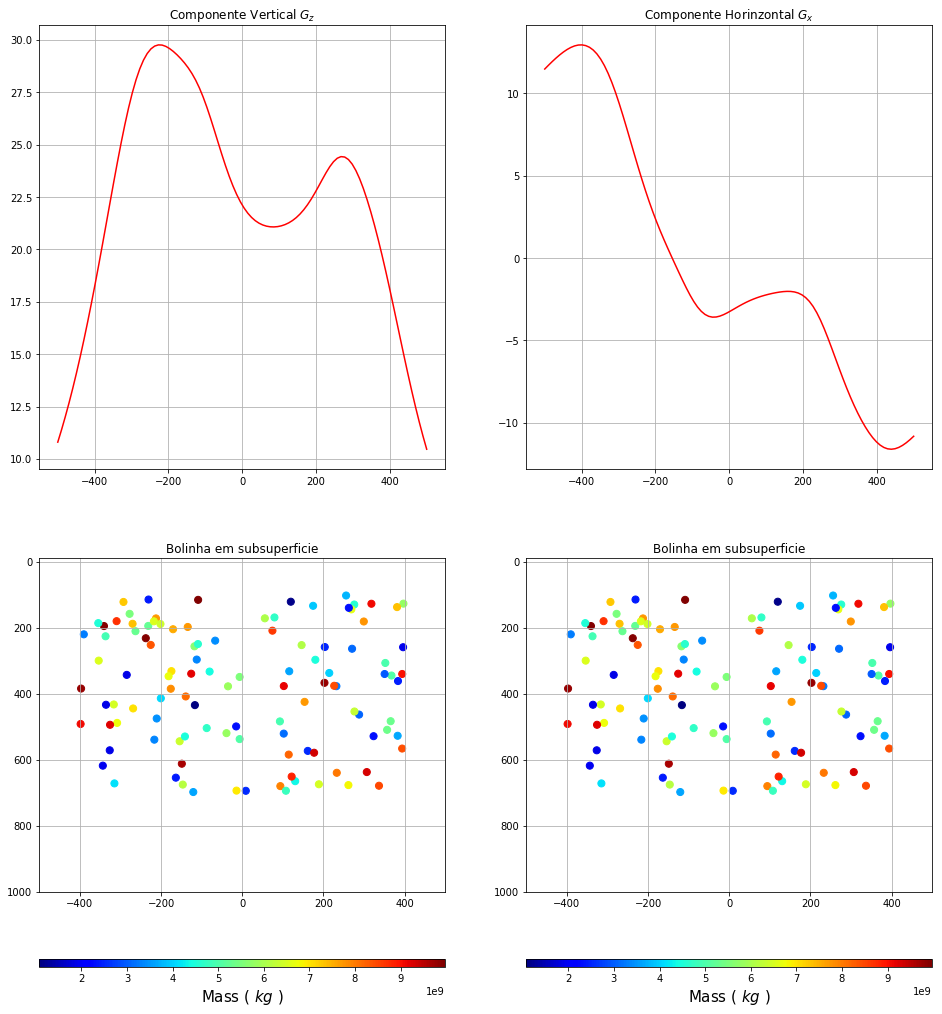

In [12]:
# plotando o resultado:
plt.close('all')
plt.figure(figsize=(16,18), facecolor='w')
#circle1=plt.Circle((sphere1[0],sphere1[1]),radius=10.0, color='r')
#circle2 = plt.Circle((sphere2[0],sphere2[1]),radius=10.0,color='b')
#circle3 = plt.Circle((sphere3[0],sphere3[1]),radius=10.0,color = 'k')
plt.subplot(2,2,1)
plt.plot(x,gz1,'r')
plt.title('Componente Vertical $G_z$')
plt.grid()

# plotando o resultado:
#plt.close('all')
#plt.figure(figsize=(8,12))
#circle1=plt.Circle((sphere1[0],sphere1[1]),radius=10.0, color='r')
#circle2 = plt.Circle((sphere2[0],sphere2[1]),radius=10.0,color='b')
#circle3 = plt.Circle((sphere3[0],sphere3[1]),radius=10.0,color = 'k')
plt.subplot(2,2,2)
plt.plot(x,gx1,'r')
plt.title('Componente Horinzontal $G_x$')
plt.grid()

plt.subplot(2,2,3)
#plt.contourf(X, Y, U1, 25, cmap = plt.cm.jet)

p1 = plt.scatter(sphere.T[0], sphere.T[1], s=50.0, c=sphere.T[2],cmap='jet')
cbar = plt.colorbar(p1, aspect = 50, fraction = 0.1, orientation="horizontal")
cbar.set_label('Mass ( $ kg $ )',fontsize=15, rotation = 0)

#plt.gcf().gca().add_artist(circle1)
#plt.gcf().gca().add_artist(circle2)
plt.title('Bolinha em subsuperficie')
plt.grid()
#plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
#plt.ylim( (z[25] , zmed + 2*raio) )

plt.xlim( min(x), max(x) )
plt.ylim( min(z), 1000.0 )

plt.gca().invert_yaxis()
#plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()

plt.subplot(2,2,4)
#plt.contourf(X, Y, U1, 25, cmap = plt.cm.jet)

p1 = plt.scatter(sphere.T[0], sphere.T[1], s=50.0, c=sphere.T[2],cmap='jet')
cbar = plt.colorbar(p1, aspect = 50, fraction = 0.1, orientation="horizontal")
cbar.set_label('Mass ( $ kg $ )',fontsize=15, rotation = 0)

#plt.gcf().gca().add_artist(circle1)
#plt.gcf().gca().add_artist(circle2)
plt.title('Bolinha em subsuperficie')
plt.grid()
#plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
#plt.ylim( (z[25] , zmed + 2*raio) )

plt.xlim( min(x), max(x) )
plt.ylim( min(z), 1000.0 )

plt.gca().invert_yaxis()
#plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()
plt.show()


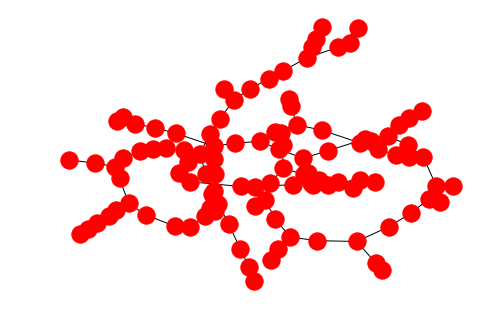

In [13]:
G,TSG = getgraph(sphere.T)
nx.draw(TSG)

In [14]:
#Calculating the phi funtcion and the mean
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(sphere.T)
print('L2=', phi1, dmst1)
phi2, dmst2 = distgraphl1(sphere.T)
print('L1=',phi2, dmst2)
phi3, dmst3 = distgraphmaha(sphere.T)
print('Maha=', phi3, dmst3)

L2= 52282.4771324 45.5814444669
L1= 1972.57679667 45.5814444669
Maha= 0.00381358837407 45.5814444669


In [15]:
node2 = np.zeros(npoints)
for i in range(npoints):
    node2[i] = int(i)

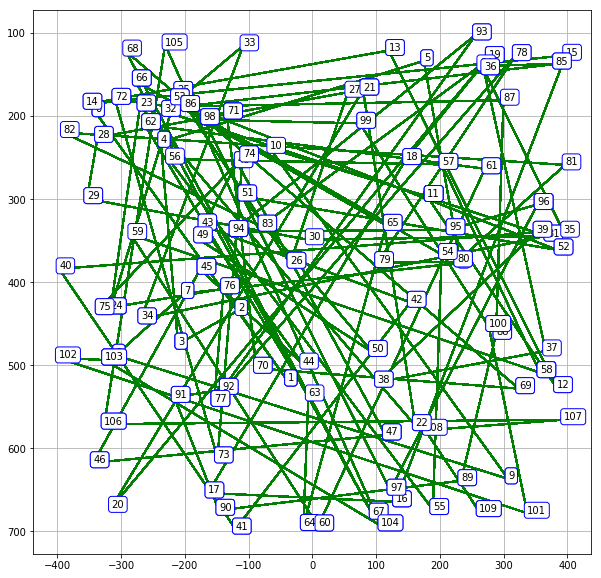

In [16]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSG.edges.data('weight'):
    xctl = [ sphere.T[0][i], sphere.T[0][j] ]
    yctl = [ sphere.T[1][i], sphere.T[1][j] ]
    plt.annotate( int(node2[i]), xy=(sphere.T[0][i],sphere.T[1][i]) , bbox=bbox_props)
    plt.annotate( int(node2[j]), xy=(sphere.T[0][j],sphere.T[1][j]) , bbox=bbox_props)
    plt.plot(sphere.T[0],sphere.T[1],'.-g')
plt.grid()
p1 = plt.plot(sphere.T[0],sphere.T[1], 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()